In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_csv('D:/Anna/Anna/zhuanti/data.csv')

In [3]:
df

,time,stateRun,private,price,windSpeed,sunshineHour,temperature,special
0,2021-11-01-00,236.4,14.0,600.0,2.2,0.0,21.4,0
1,2021-11-01-01,281.1,14.0,600.0,0.4,0.0,20.9,0
2,2021-11-01-02,281.1,14.0,600.0,0.8,0.0,20.9,0
3,2021-11-01-03,281.0,14.0,600.0,1.5,0.0,21.1,0
4,2021-11-01-04,281.0,14.0,600.0,1.4,0.0,21.4,0
...,...,...,...,...,...,...,...,...
6307,2022-07-31-19,0.0,42.2,600.0,0.0,0.0,28.7,0
6308,2022-07-31-20,0.0,42.2,600.0,0.4,0.0,29.6,0
6309,2022-07-31-21,0.0,42.2,600.0,0.7,0.0,29.2,0
6310,2022-07-31-22,0.0,42.2,600.0,0.8,0.0,29.2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6312 entries, 0 to 6311
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          6312 non-null   object 
 1   stateRun      6312 non-null   float64
 2   private       6312 non-null   float64
 3   price         6312 non-null   float64
 4   windSpeed     6312 non-null   float64
 5   sunshineHour  6312 non-null   float64
 6   temperature   6312 non-null   float64
 7   special       6312 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 394.6+ KB


In [5]:
df['total'] = df['stateRun'] + df['private']

In [7]:
# 原本為2021-11-01-00，現將其拆解並新增欄位存取資料
df['month'] = df['time'].str.split('-', expand = True)[1]
df['month'] = df['month'].astype(int)
df['date'] = df['time'].str.split('-', expand = True)[2]
df['date'] = df['date'].astype(int)
df['hour'] = df['time'].str.split('-', expand = True)[3]
df['hour'] = df['hour'].astype(int)
df['total'] = df['stateRun'] + df['private']

In [8]:
df_nov = df[df['month'] == 11]

In [9]:
df_nov

,time,stateRun,private,price,windSpeed,sunshineHour,temperature,special,total,month,date,hour
0,2021-11-01-00,236.4,14.0,600.0,2.2,0.0,21.4,0,250.4,11,1,0
1,2021-11-01-01,281.1,14.0,600.0,0.4,0.0,20.9,0,295.1,11,1,1
2,2021-11-01-02,281.1,14.0,600.0,0.8,0.0,20.9,0,295.1,11,1,2
3,2021-11-01-03,281.0,14.0,600.0,1.5,0.0,21.1,0,295.0,11,1,3
4,2021-11-01-04,281.0,14.0,600.0,1.4,0.0,21.4,0,295.0,11,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-11-30-19,80.0,14.0,595.0,4.6,0.0,20.1,0,94.0,11,30,19
692,2021-11-30-20,80.0,14.0,595.0,5.2,0.0,19.5,0,94.0,11,30,20
693,2021-11-30-21,80.0,14.0,595.0,7.1,0.0,19.0,0,94.0,11,30,21
694,2021-11-30-22,80.0,14.0,595.0,6.6,0.0,18.3,0,94.0,11,30,22


In [ ]:
df_nov['weekday'] = df_nov['date']
df_nov['type'] = df_nov['date']

In [8]:
for i in range(len(df_nov)):
    if df_nov['day'][i] % 7 == 1:
        df_nov['weekday'][i] = 'Mon'
        df_nov['type'][i] = 'weekday'
    elif df_nov['day'][i] % 7 == 2:
        df_nov['weekday'][i] = 'Tue'
        df_nov['type'][i] = 'weekday'
    elif df_nov['day'][i]  % 7 == 3:
        df_nov['weekday'][i] = 'Wed'
        df_nov['type'][i] = 'weekday'
    elif df_nov['day'][i]  % 7 == 4:
        df_nov['weekday'][i] = 'Thu'
        df_nov['type'][i] = 'weekday'
    elif df_nov['day'][i]  % 7 == 5:
        df_nov['weekday'][i] = 'Fri'
        df_nov['type'][i] = 'weekday'
    elif df_nov['day'][i]  % 7 == 6:
        df_nov['weekday'][i] = 'Sat'
        df_nov['type'][i] = 'weekend'
    else:
        df_nov['weekday'][i] = 'Sun'
        df_nov['type'][i] = 'weekend'
    

C:\Users\USER\AppData\Local\Temp/ipykernel_19000/2289161447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nov['weekday'][i] = 'Mon'
C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\USER\AppData\Local\Temp/ipykernel_19000/2289161447.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [20]:
df_nov

,year,month,day,hour,stateRun,private,price,total,weekday,type
0,2021,11,1,0,236.4,14.0,600,250.4,Mon,weekday
1,2021,11,1,1,281.1,14.0,600,295.1,Mon,weekday
2,2021,11,1,2,281.1,14.0,600,295.1,Mon,weekday
3,2021,11,1,3,281.0,14.0,600,295.0,Mon,weekday
4,2021,11,1,4,281.0,14.0,600,295.0,Mon,weekday
...,...,...,...,...,...,...,...,...,...,...
691,2021,11,30,19,80.0,14.0,595,94.0,Tue,weekday
692,2021,11,30,20,80.0,14.0,595,94.0,Tue,weekday
693,2021,11,30,21,80.0,14.0,595,94.0,Tue,weekday
694,2021,11,30,22,80.0,14.0,595,94.0,Tue,weekday


In [21]:
# df_nov_first = df_nov[:168]
# del df_nov_first['year']
# del df_nov_first['month']
# del df_nov_first['day']
# del df_nov_first['hour']
# del df_nov_first['price']
# del df_nov_first['private']

In [22]:
#g = df_nov.groupby(['hour'])

In [23]:
g = df_nov

In [24]:
g

,year,month,day,hour,stateRun,private,price,total,weekday,type
0,2021,11,1,0,236.4,14.0,600,250.4,Mon,weekday
1,2021,11,1,1,281.1,14.0,600,295.1,Mon,weekday
2,2021,11,1,2,281.1,14.0,600,295.1,Mon,weekday
3,2021,11,1,3,281.0,14.0,600,295.0,Mon,weekday
4,2021,11,1,4,281.0,14.0,600,295.0,Mon,weekday
...,...,...,...,...,...,...,...,...,...,...
691,2021,11,30,19,80.0,14.0,595,94.0,Tue,weekday
692,2021,11,30,20,80.0,14.0,595,94.0,Tue,weekday
693,2021,11,30,21,80.0,14.0,595,94.0,Tue,weekday
694,2021,11,30,22,80.0,14.0,595,94.0,Tue,weekday


In [25]:
g = g[g['type'] == 'weekend']

In [26]:
data_1 = g[g['hour'] == 0]['total']
data_2 = g[g['hour'] == 1]['total']
data_3 = g[g['hour'] == 2]['total']
data_4 = g[g['hour'] == 3]['total']
data_5 = g[g['hour'] == 4]['total']
data_6 = g[g['hour'] == 5]['total']
data_7 = g[g['hour'] == 6]['total']
data_8 = g[g['hour'] == 7]['total']
data_9 = g[g['hour'] == 8]['total']
data_10 = g[g['hour'] == 9]['total']
data_11 = g[g['hour'] == 10]['total']
data_12 = g[g['hour'] == 11]['total']
data_13 = g[g['hour'] == 12]['total']
data_14 = g[g['hour'] == 13]['total']
data_15 = g[g['hour'] == 14]['total']
data_16 = g[g['hour'] == 15]['total']
data_17 = g[g['hour'] == 16]['total']
data_18 = g[g['hour'] == 17]['total']
data_19 = g[g['hour'] == 18]['total']
data_20 = g[g['hour'] == 19]['total']
data_21 = g[g['hour'] == 20]['total']
data_22 = g[g['hour'] == 21]['total']
data_23 = g[g['hour'] == 22]['total']
data_24 = g[g['hour'] == 23]['total']

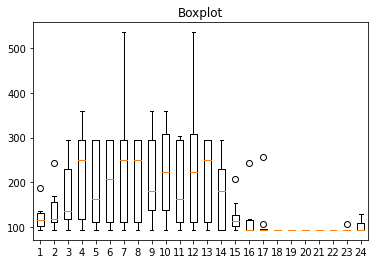

In [27]:
data_total = [data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12,data_13,data_14,data_15,data_16,data_17,data_18,data_19,data_20,data_21,data_22,data_23,data_24]
plt.boxplot(data_total)
plt.title("Boxplot")
plt.show()

In [4]:
df[['stateRun','private','price']].describe()

,stateRun,private,price
count,2856.000000,2856.000000,2856.000000
mean,193.915546,14.437150,594.731443
std,138.296601,1.063034,12.439711
min,2.000000,5.000000,455.000000
25%,80.000000,14.000000,595.000000
50%,137.900000,14.000000,596.000000
75%,289.450000,15.100000,600.000000
max,655.000000,19.100000,600.000000


In [5]:
g = df.groupby(["year","month"])

year  month
2021  11       AxesSubplot(0.125,0.125;0.775x0.755)
      12       AxesSubplot(0.125,0.125;0.775x0.755)
2022  1        AxesSubplot(0.125,0.125;0.775x0.755)
      2        AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

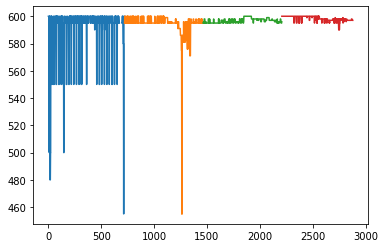

In [9]:
g.price.plot()